# Preprocessing Counties Data


In [47]:
pip install openpyxl

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [49]:
counties = "/content/us_census_2018_population_estimates_counties.csv"
# Carreguem el dataset
df = pd.read_csv(counties)
print(df.head())
df.shape

  state   county state_name  geo_id  population  pop_density
0    AL  Autauga    Alabama    1001       55601    93.534505
1    AL  Baldwin    Alabama    1003      218022   137.138546
2    AL  Barbour    Alabama    1005       24881    28.114060
3    AL     Bibb    Alabama    1007       22400    35.986169
4    AL   Blount    Alabama    1009       57840    89.697955


(3220, 6)

In [50]:
# Creem una còpia del DataFrame per preprocessar-ho
df_preprocesado = df.copy()

## Selecció de variables


Eliminem la variable "state", que és l'abreujament de "state_name". Eliminem també la variable "geo_id" ja que no aporta res al nostre anàlisi.

In [51]:
df_preprocesado = df_preprocesado.drop(['state', 'geo_id'], axis=1)

Renomenem la variable:
- state_name --> state

In [52]:
df_preprocesado = df_preprocesado.rename(columns={'state_name': 'state'})

## Gestió missings

In [53]:
missings = df_preprocesado.isnull().sum()
print(missings)

county          0
state           0
population      0
pop_density    78
dtype: int64


In [54]:
# Busquem els counties amb valors nulls a la "pop_density"
counties_null_pop_density = df_preprocesado[df_preprocesado['pop_density'].isnull()]['county'].tolist()
counties_null_pop_density

['Adjuntas Municipio',
 'Aguada Municipio',
 'Aguadilla Municipio',
 'Aguas Buenas Municipio',
 'Aibonito Municipio',
 'Añasco Municipio',
 'Arecibo Municipio',
 'Arroyo Municipio',
 'Barceloneta Municipio',
 'Barranquitas Municipio',
 'Bayamón Municipio',
 'Cabo Rojo Municipio',
 'Caguas Municipio',
 'Camuy Municipio',
 'Canóvanas Municipio',
 'Carolina Municipio',
 'Cataño Municipio',
 'Cayey Municipio',
 'Ceiba Municipio',
 'Ciales Municipio',
 'Cidra Municipio',
 'Coamo Municipio',
 'Comerío Municipio',
 'Corozal Municipio',
 'Culebra Municipio',
 'Dorado Municipio',
 'Fajardo Municipio',
 'Florida Municipio',
 'Guánica Municipio',
 'Guayama Municipio',
 'Guayanilla Municipio',
 'Guaynabo Municipio',
 'Gurabo Municipio',
 'Hatillo Municipio',
 'Hormigueros Municipio',
 'Humacao Municipio',
 'Isabela Municipio',
 'Jayuya Municipio',
 'Juana Díaz Municipio',
 'Juncos Municipio',
 'Lajas Municipio',
 'Lares Municipio',
 'Las Marías Municipio',
 'Las Piedras Municipio',
 'Loíza Municip

Els 78 valors faltants corresponen a Puerto Rico. Busquem la densitat de població dels municipis a Puerto Rico a través del Cens de 2020. Creem un diccionari amb el nom de cada municipi i la corresponent densitat de població.


In [55]:
densidad_poblacion = {
    'San Juan Municipio': 7.1471,
    'Cataño Municipio': 4.7920,
    'Bayamón Municipio': 4.1732,
    'Carolina Municipio': 3.4121,
    'Trujillo Alto Municipio': 3.2633,
    'Guaynabo Municipio': 3.2547,
    'Toa Baja Municipio': 3.2392,
    'Toa Alta Municipio': 2.4744,
    'Caguas Municipio': 2.1713,
    'Dorado Municipio': 1.5521,
    'Aguadilla Municipio': 1.5083,
    'Gurabo Municipio': 1.4568,
    'Juncos Municipio': 1.3972,
    'Hormigueros Municipio': 1.3797,
    'Canóvanas Municipio': 1.2881,
    'Vega Alta Municipio': 1.2765,
    'Aguada Municipio': 1.2358,
    'Loíza Municipio': 1.2229,
    'Barceloneta Municipio': 1.2119,
    'Ponce Municipio': 1.1962,
    'Vega Baja Municipio': 1.1868,
    'Humacao Municipio': 1.1382,
    'Cidra Municipio': 1.1096,
    'Fajardo Municipio': 1.0743,
    'Naranjito Municipio': 1.0672,
    'Rincón Municipio': 1.0629,
    'Arroyo Municipio': 1.0556,
    'Quebradillas Municipio': 1.0421,
    'Las Piedras Municipio': 1.0384,
    'Mayagüez Municipio': 0.9408,
    'Hatillo Municipio': 0.9212,
    'Manatí Municipio': 0.8749,
    'Barranquitas Municipio': 0.8461,
    'Corozal Municipio': 0.8122,
    'Aguas Buenas Municipio': 0.8052,
    'Cayey Municipio': 0.8020,
    'Aibonito Municipio': 0.7868,
    'Isabela Municipio': 0.7764,
    'Río Grande Municipio': 0.7763,
    'Juana Díaz Municipio': 0.7721,
    'Florida Municipio': 0.7688,
    'Moca Municipio': 0.7441,
    'Morovis Municipio': 0.7390,
    'San Lorenzo Municipio': 0.7097,
    'Camuy Municipio': 0.7082,
    'Arecibo Municipio': 0.6968,
    'Luquillo Municipio': 0.6889,
    'Cabo Rojo Municipio': 0.6702,
    'Comerío Municipio': 0.6649,
    'Añasco Municipio': 0.6515,
    'Sabana Grande Municipio': 0.6259,
    'Villalba Municipio': 0.6199,
    'Santa Isabel Municipio': 0.5959,
    'San Germán Municipio': 0.5850,
    'Guayama Municipio': 0.5629,
    'San Sebastián Municipio': 0.5587,
    'Yabucoa Municipio': 0.5510,
    'Yauco Municipio': 0.5047,
    'Maunabo Municipio': 0.5003,
    'Lares Municipio': 0.4574,
    'Peñuelas Municipio': 0.4572,
    'Naguabo Municipio': 0.4527,
    'Coamo Municipio': 0.4444,
    'Guayanilla Municipio': 0.4207,
    'Ceiba Municipio': 0.3894,
    'Lajas Municipio': 0.3892,
    'Guánica Municipio': 0.3721,
    'Salinas Municipio': 0.3716,
    'Patillas Municipio': 0.3430,
    'Orocovis Municipio': 0.3369,
    'Jayuya Municipio': 0.3319,
    'Adjuntas Municipio': 0.2702,
    'Ciales Municipio': 0.2553,
    'Utuado Municipio': 0.2492,
    'Las Marías Municipio': 0.1914,
    'Vieques Municipio': 0.1624,
    'Culebra Municipio': 0.1539,
    'Maricao Municipio': 0.1298
}


Recorrem la llista "counties_null_pop_density" per comprovar si el nom de cada comtat està al diccionari densitat_poblacion. Si el comtat està al diccionari, s'actualitza el valor de pop_density al DataFrame usant el valor corresponent del diccionari.

In [56]:
for county in counties_null_pop_density:
    if county in densidad_poblacion:
        df_preprocesado.loc[df_preprocesado['county'] == county, 'pop_density'] = densidad_poblacion[county]


Tornem a mirar l'existència de missings per corroborar que no hi hagi més valors faltants.

In [57]:
missings = df_preprocesado.isnull().sum()
print(missings)

county         0
state          0
population     0
pop_density    0
dtype: int64


## Estatístiques descriptives

In [58]:
# Població y Densitat de Població
print(df_preprocesado['population'].describe())
print(df_preprocesado['pop_density'].describe())


count    3.220000e+03
mean     1.025971e+05
std      3.296352e+05
min      8.800000e+01
25%      1.113600e+04
50%      2.606350e+04
75%      6.701325e+04
max      1.010552e+07
Name: population, dtype: float64
count     3220.000000
mean       266.506798
std       1781.984073
min          0.036593
25%         14.749124
50%         42.766024
75%        112.492102
max      71886.166433
Name: pop_density, dtype: float64


## Distribució de Població i Densitat de Població

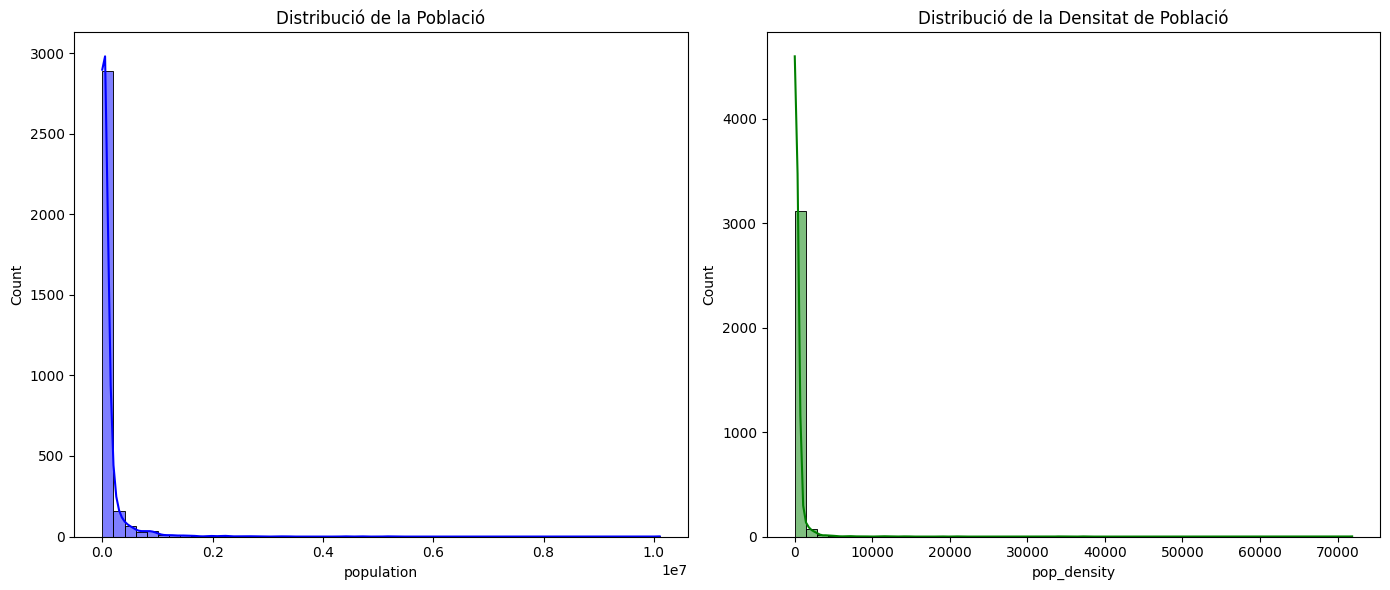

In [59]:
# Histogramas
plt.figure(figsize=(14, 6))

# Població
plt.subplot(1, 2, 1)
sns.histplot(df_preprocesado['population'], kde=True, color='blue', bins=50)
plt.title('Distribució de la Població')

# Densitat de Població
plt.subplot(1, 2, 2)
sns.histplot(df_preprocesado['pop_density'], kde=True, color='green', bins=50)
plt.title('Distribució de la Densitat de Població')

plt.tight_layout()
plt.show()


Tots dos histogrames revelen com la major part de les dades sobre població i la seva densitat es concentren als nivells més baixos del rang. Això suggereix que hi ha moltes àrees amb poblacions relativament petites, mentre que les àrees amb poblacions més altes són rares. Com que són dades reals i ens seran útils no les modificarem. Posteriorment podrem agrupar els estats per densitat de població per tractar millor cada cas.

In [60]:
df_preprocesado.head()

,county,state,population,pop_density
0,Autauga,Alabama,55601,93.534505
1,Baldwin,Alabama,218022,137.138546
2,Barbour,Alabama,24881,28.114060
3,Bibb,Alabama,22400,35.986169
4,Blount,Alabama,57840,89.697955


In [61]:
# Guardem el DataFrame preprocessat
df_preprocesado.to_csv("us_census_2018_population_estimates_counties_cleaned.csv", index=False)

# Preprocessing Beds Data

In [62]:
beds = "/content/kff_usa_hospital_beds_per_capita_2018.csv"

# Carreguem el dataset
df2 = pd.read_csv(beds)
print(df2.head())
df2.shape

  state  state_name  state_local_government  non_profit  for_profit  total
0    AK      Alaska                     0.3         1.5         0.4    2.2
1    AL     Alabama                     1.4         0.8         0.9    3.1
2    AR    Arkansas                     0.3         2.2         0.7    3.2
3    AZ     Arizona                     0.1         1.3         0.5    1.9
4    CA  California                     0.3         1.2         0.3    1.8


(51, 6)

In [63]:
# Creem una còpia del DataFrame per preprocessar-ho
df_preprocesado2 = df2.copy()

## Selecció de variables

Com ho vam fer prèviament, eliminem la variable "state", que és l'abreujament de "state_name".

In [64]:
df_preprocesado2 = df_preprocesado2.drop('state', axis=1)
df_preprocesado2 = df_preprocesado2.rename(columns={'state_name': 'state'})

## Gestió missings

In [65]:
# Identificar i comptar els missings
missings2 = df_preprocesado2.isnull().sum()
print(missings2)

state                     0
state_local_government    8
non_profit                0
for_profit                5
total                     0
dtype: int64


Omplim amb 0 els valors faltants. Aquests no es tenen en compte en fer la suma total de llits, i com que són pocs els tractarem com si l'hospital no comptés amb llits

In [26]:
df_preprocesado2 = df_preprocesado2.fillna(0)

## Estatístiques descriptives

In [66]:
df_preprocesado2[['state_local_government', 'non_profit', 'for_profit', 'total']].describe()


,state_local_government,non_profit,for_profit,total
count,43.000000,51.000000,46.000000,51.000000
mean,0.446512,1.864706,0.441304,2.635294
std,0.475269,0.791410,0.311681,0.750952
min,0.000000,0.500000,0.000000,1.600000
25%,0.200000,1.300000,0.200000,2.100000
50%,0.300000,1.800000,0.400000,2.500000
75%,0.500000,2.200000,0.700000,3.100000
max,2.600000,4.300000,1.300000,4.800000


## Visualització de les variables numèriques i outliers

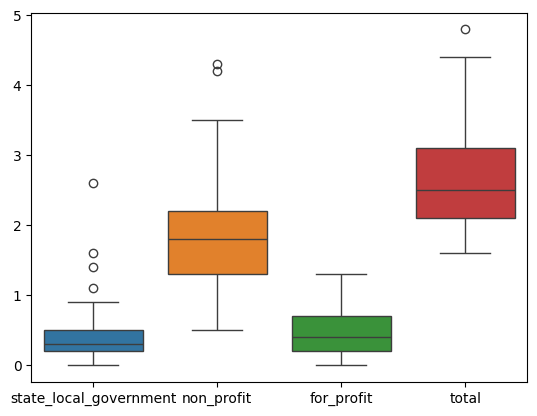

In [67]:
sns.boxplot(data=df_preprocesado2[['state_local_government', 'non_profit', 'for_profit','total']])
plt.show()

In [68]:
# Rang interquartil (IQR)
Q1 = df_preprocesado2[['state_local_government', 'non_profit', 'for_profit', 'total']].quantile(0.25)
Q3 = df_preprocesado2[['state_local_government', 'non_profit', 'for_profit', 'total']].quantile(0.75)
IQR = Q3 - Q1

# Límits superior i inferior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifiquem els outliers
outliers = ((df_preprocesado2[['state_local_government', 'non_profit', 'for_profit', 'total']] < lower_bound) |
            (df_preprocesado2[['state_local_government', 'non_profit', 'for_profit', 'total']] > upper_bound))

outliers_df = df_preprocesado2[outliers.any(axis=1)]
print(outliers_df)

           state  state_local_government  non_profit  for_profit  total
1        Alabama                     1.4         0.8         0.9    3.1
16        Kansas                     1.1         1.4         0.8    3.3
25   Mississippi                     1.6         1.6         0.8    4.0
28  North Dakota                     NaN         4.2         0.1    4.3
41  South Dakota                     0.2         4.3         0.2    4.8
50       Wyoming                     2.6         0.5         0.4    3.5


Hi han algunes institucions amb quantitats considerablement baixes de llits a "state_local_government", això pot ser perquè operen amb pressupostos ajustats. D'altra banda, la categoria "non_profit" presenta valors atípics per sobre del límit superior, hi ha un nombre notablement més gran de llits, això pot ser perquè tendeixen a ser més grans i es beneficien de donacions. Quant a "for_profit", suggereix una capacitat mitjana menor i menys disparitat entre les entitats d'aquesta categoria. Ja que els outliers en aquest cas són valors vàlids, no cal eliminar-los.

In [69]:
df_preprocesado2.head()

,state,state_local_government,non_profit,for_profit,total
0,Alaska,0.3,1.5,0.4,2.2
1,Alabama,1.4,0.8,0.9,3.1
2,Arkansas,0.3,2.2,0.7,3.2
3,Arizona,0.1,1.3,0.5,1.9
4,California,0.3,1.2,0.3,1.8


In [70]:
# Guardem el DataFrame preprocessat
df_preprocesado2.to_csv("kff_usa_hospital_beds_per_capita_2018_cleaned.csv", index=False)

# Preprocessing Insurance Data

In [71]:
insurance = "/content/acs_2018_health_insurance_coverage_estimates.csv"

# Cargamos el dataset
df3 = pd.read_csv(insurance)

# Mostramos las primeras filas
print(df3.head())
df3.shape

   geo_id state state_name acs_variable   estimate  margin_of_error  \
0       1    AL    Alabama    DP03_0096  4307566.0           8603.0   
1       1    AL    Alabama   DP03_0096P       90.0              0.2   
2       1    AL    Alabama    DP03_0097  3221648.0          15028.0   
3       1    AL    Alabama   DP03_0097P       67.3              0.3   
4       1    AL    Alabama    DP03_0098  1745707.0          10498.0   

                                               label  \
0  Estimate!!HEALTH INSURANCE COVERAGE!!Civilian ...   
1  Percent Estimate!!HEALTH INSURANCE COVERAGE!!C...   
2  Estimate!!HEALTH INSURANCE COVERAGE!!Civilian ...   
3  Percent Estimate!!HEALTH INSURANCE COVERAGE!!C...   
4  Estimate!!HEALTH INSURANCE COVERAGE!!Civilian ...   

                             concept        estimate_type  \
0  Selected Economic Characteristics  population_estimate   
1  Selected Economic Characteristics     percent_estimate   
2  Selected Economic Characteristics  population_esti

(1768, 13)

In [72]:
# Creem una còpia del DataFrame per preprocessar-ho
df_preprocesado3 = df3.copy()

## Selecció de variables

Un cop més eliminem les variables "geo_id" i "state". També eliminarem "label" ja que es pot deduir a partir de la resta de variables (és redundant). Eliminem la variable “concept”, que té un únic valor que ajuda a contextualitzar. La variable "employed" té un 52.94% de missings, que és més de la meitat, per això també l'eliminem.

In [73]:
# Eliminem geo_id, state, acs_variable, label, concept, employed
df_preprocesado3 = df_preprocesado3.drop(['geo_id', 'state', 'label', 'concept', 'employed'], axis=1)

# Reanomenem state_name a state
df_preprocesado3 = df_preprocesado3.rename(columns={'state_name': 'state'})


## Gestió missings

In [74]:
missings3 = df_preprocesado3.isnull().sum()
print(missings3)

state                0
acs_variable         0
estimate             0
margin_of_error      0
estimate_type        0
coverage_type        0
age_group            0
labor_force        520
dtype: int64


In [75]:
missing_values = df_preprocesado3[['labor_force']].isnull().mean() * 100

print(missing_values)

labor_force    29.411765
dtype: float64


Per imputar els valors faltants a "labor_force" creem la categoria Unknown per evitar esbiaixar els valors.

In [76]:
df_preprocesado3['labor_force'] = df_preprocesado3['labor_force'].fillna("Unknown")

missings3 = df_preprocesado3.isnull().sum()
missings3


,0
state,0
acs_variable,0
estimate,0
margin_of_error,0
estimate_type,0
coverage_type,0
age_group,0
labor_force,0


## Codificació variables categóriques

Utilitzem One-Hot Encoding amb pd.get_dummies per codificar les variables categòriques, convertint-les en variables numèriques binàries. Aquest procés és necessari perquè els models de machine learning no poden interpretar directament variables categòriques

In [77]:
# One-Hot Encoding
df_preprocesado3 = pd.get_dummies(df_preprocesado3, columns=['estimate_type','coverage_type','age_group','labor_force'], drop_first=True)


In [78]:
df_preprocesado3.head()

,state,acs_variable,estimate,margin_of_error,estimate_type_population_estimate,coverage_type_With health insurance coverage,coverage_type_With private health insurance,coverage_type_With public coverage,age_group_ under 19 years,age_group_overall,labor_force_Not in labor force,labor_force_Unknown
0,Alabama,DP03_0096,4307566.0,8603.0,True,True,False,False,False,True,False,True
1,Alabama,DP03_0096P,90.0,0.2,False,True,False,False,False,True,False,True
2,Alabama,DP03_0097,3221648.0,15028.0,True,False,True,False,False,True,False,True
3,Alabama,DP03_0097P,67.3,0.3,False,False,True,False,False,True,False,True
4,Alabama,DP03_0098,1745707.0,10498.0,True,False,False,True,False,True,False,True


In [79]:
# Reemplacem True amb 1 i False amb 0
df_preprocesado3 = df_preprocesado3.replace({True: 1, False: 0})


<ipython-input-79-b5d54586ad70>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_preprocesado3 = df_preprocesado3.replace({True: 1, False: 0})


In [80]:
# Renanomenem les columnes
df_preprocesado3.rename(columns={
    'estimate_type_population_estimate': 'estimate_type_population',
    'coverage_type_With health insurance coverage': 'health_insurance_coverage',
    'coverage_type_With private health insurance': 'private_insurance_coverage',
    'coverage_type_With public coverage': 'public_coverage',
    'labor_force_Not in labor force': 'not_in_labor_force',
    'age_group_ under 19 years': 'age_group_under_19'
}, inplace=True)

print(df_preprocesado3.head())


     state acs_variable   estimate  margin_of_error  estimate_type_population  \
0  Alabama    DP03_0096  4307566.0           8603.0                         1   
1  Alabama   DP03_0096P       90.0              0.2                         0   
2  Alabama    DP03_0097  3221648.0          15028.0                         1   
3  Alabama   DP03_0097P       67.3              0.3                         0   
4  Alabama    DP03_0098  1745707.0          10498.0                         1   

   health_insurance_coverage  private_insurance_coverage  public_coverage  \
0                          1                           0                0   
1                          1                           0                0   
2                          0                           1                0   
3                          0                           1                0   
4                          0                           0                1   

   age_group_under_19  age_group_overall  not_in_l

In [81]:
df_preprocesado3.head()

,state,acs_variable,estimate,margin_of_error,estimate_type_population,health_insurance_coverage,private_insurance_coverage,public_coverage,age_group_under_19,age_group_overall,not_in_labor_force,labor_force_Unknown
0,Alabama,DP03_0096,4307566.0,8603.0,1,1,0,0,0,1,0,1
1,Alabama,DP03_0096P,90.0,0.2,0,1,0,0,0,1,0,1
2,Alabama,DP03_0097,3221648.0,15028.0,1,0,1,0,0,1,0,1
3,Alabama,DP03_0097P,67.3,0.3,0,0,1,0,0,1,0,1
4,Alabama,DP03_0098,1745707.0,10498.0,1,0,0,1,0,1,0,1


In [82]:
# Guardem el DataFrame preprocessat
df_preprocesado3.to_csv("acs_2018_health_insurance_coverage_estimates_cleaned.csv", index=False)

METADATA

In [83]:
import json
import numpy as np

def obtener_metadata(df, nombre):
    return {
        "Nom": nombre,
        "Nombre de mostres": int(df.shape[0]),
        "Nombre d'atributs": int(df.shape[1]),
        "Valors nuls despres del preprocessament": int(df.isnull().sum().sum()),
        "Valors nuls per columna": {k: int(v) for k, v in df.isnull().sum().to_dict().items()}
    }

# Generar la metadata de cada dataset
metadata_acs = obtener_metadata(df_preprocesado, "ACS Health Insurance 2018")
metadata_kff = obtener_metadata(df_preprocesado2, "KFF Hospital Beds per Capita 2018")
metadata_census = obtener_metadata(df_preprocesado3, "US Census Population 2018")

# Mostrar resultados
print(json.dumps([metadata_acs, metadata_kff, metadata_census], indent=4))

[
    {
        "Nom": "ACS Health Insurance 2018",
        "Nombre de mostres": 3220,
        "Nombre d'atributs": 4,
        "Valors nuls despres del preprocessament": 0,
        "Valors nuls per columna": {
            "county": 0,
            "state": 0,
            "population": 0,
            "pop_density": 0
        }
    },
    {
        "Nom": "KFF Hospital Beds per Capita 2018",
        "Nombre de mostres": 51,
        "Nombre d'atributs": 5,
        "Valors nuls despres del preprocessament": 13,
        "Valors nuls per columna": {
            "state": 0,
            "state_local_government": 8,
            "non_profit": 0,
            "for_profit": 5,
            "total": 0
        }
    },
    {
        "Nom": "US Census Population 2018",
        "Nombre de mostres": 1768,
        "Nombre d'atributs": 12,
        "Valors nuls despres del preprocessament": 0,
        "Valors nuls per columna": {
            "state": 0,
            "acs_variable": 0,
            "estimate": 